# Question 3

## First of all I take the data I need and import the libreries

In [80]:
import clustering_lib as cl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
%matplotlib inline

df = pd.read_csv('wine.data', header=None)
df.columns=['class identifier','Alcohol', 'Malic acid','Ash','Alcalinity of ash',
            'Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols',
            'Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']
# I remove class identifier because it's not necessary in the cluster
df_clean=df.drop(['class identifier'], axis=1)
df_clean.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### We chose k=3 for our clustering
For more details see Note1

In [81]:
np.random.seed(200)
k = 3

# Now we want to be more precise: we'll calculate max and min for value in every field to be sure to use every one 
# of our random centroids
cols=list(df_clean.columns)
#print(cols)
maxvec=[]
minvec=[]
for i in cols:
    ma=df[i].max()
    maxvec.append(ma)
    mi=df[i].min()
    minvec.append(mi)

centroids = {
    i+1: [round(np.random.uniform(minvec[j], maxvec[j]),4) for j in range(13)]
    for i in range(k)
}
centroids

{1: [14.631,
  1.8863,
  2.4716,
  18.9092,
  140.3009,
  0.9883,
  2.0342,
  0.6121,
  1.8558,
  12.7867,
  1.5468,
  3.9619,
  1572.4199],
 2: [12.184,
  5.0213,
  1.5867,
  25.8402,
  93.0465,
  1.2585,
  4.8121,
  0.5678,
  2.0531,
  11.5174,
  1.1914,
  2.4987,
  1231.5801],
 3: [12.6238,
  3.9804,
  2.4982,
  12.6454,
  158.8761,
  3.1802,
  3.5615,
  0.3046,
  0.4939,
  10.6989,
  1.6766,
  2.0424,
  1188.0027]}

In [82]:
## Assignment Stage
centrDf = cl.assignmentAll(df_clean, centroids)
centrDf.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,distance_from_1,distance_from_2,distance_from_3,closest
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,15.621320,36.273071,32.645067,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,41.961197,18.252278,59.308465,2
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,40.052808,12.842568,58.485333,2
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,28.035941,22.766954,46.296886,2
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,24.105186,26.716192,42.280721,1


In [83]:
old_centroids = copy.deepcopy(centroids)

centroids = cl.updateAll(centrDf, centroids)
centroids

{1: [13.378500000000003,
  2.196,
  2.5424999999999995,
  19.44,
  123.9,
  2.518,
  2.5125,
  0.31299999999999994,
  1.779,
  5.592499999999999,
  0.9565000000000001,
  2.865,
  864.0],
 2: [12.960641025641019,
  2.366923076923077,
  2.348974358974359,
  19.522435897435894,
  95.91666666666667,
  2.2680769230769235,
  1.9705769230769221,
  0.36980769230769245,
  1.5501282051282057,
  5.0194871730769215,
  0.954205128205128,
  2.5761538461538462,
  730.8461538461538],
 3: [12.34,
  1.355,
  1.975,
  17.9,
  156.5,
  2.175,
  1.775,
  0.23,
  2.8899999999999997,
  2.725,
  1.22,
  2.8499999999999996,
  827.5]}

In [84]:
## Repeat Assigment Stage

centrDf = cl.assignmentAll(centrDf, centroids)
centrDf.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,distance_from_1,distance_from_2,distance_from_3,closest
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,5.205118,31.429796,29.858400,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,25.329235,9.398559,56.964434,2
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,22.956143,5.578102,55.626649,2
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,11.616602,17.752839,43.939809,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,6.266927,22.175475,38.729542,1


In [85]:
# Continue until all assigned categories don't change any more
while True:
    closest_centroids = centrDf['closest'].copy(deep=True)
    centroids = cl.updateAll(centrDf, centroids)
    centrDf = cl.assignmentAll(centrDf, centroids)
    if closest_centroids.equals(centrDf['closest']):
        break
finalDf=centrDf[['Alcohol', 'Malic acid','Ash','Alcalinity of ash',
            'Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols',
            'Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline','closest']]
finalDf.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,closest
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,3
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


## Now it's the time to plot the distribution of the different features 

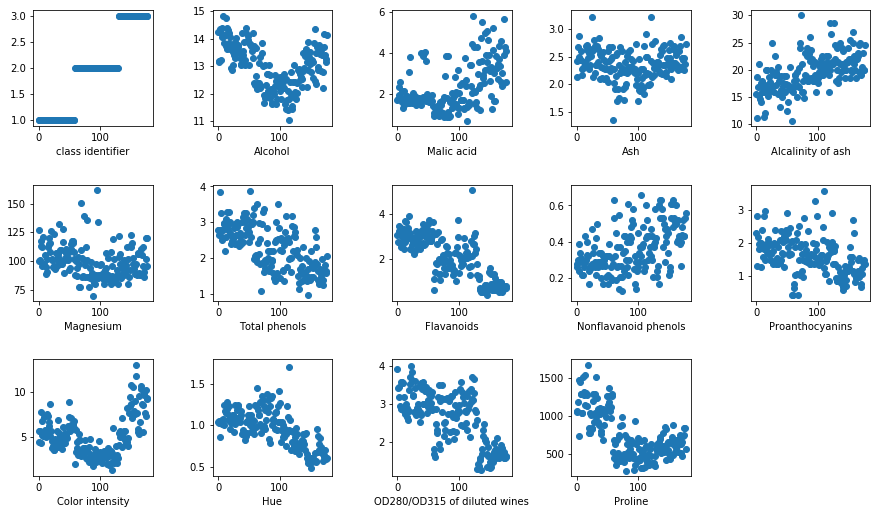

In [86]:
fig= plt.figure(figsize=(15,15))
fig.subplots_adjust(hspace=0.5,wspace=0.5)
x=1
#len(df.columns)
for i in df:
    ax=fig.add_subplot(5,5,x)
    ax.scatter(range(len(df)), df[i])
    ax.set_xlabel(i)
    x+=1


# Final consideration
## Ready soon!

## Here you can find a visualization part (not required, but ...cute!), that takes into consideration only 2 field (in this way we can realize a plot)

For more details see Note2

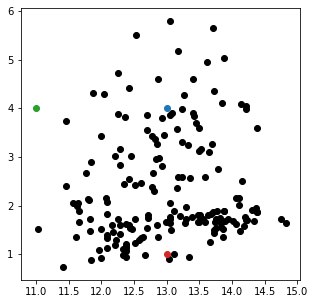

In [74]:
df_clean=df.drop(['class identifier'], axis=1)
np.random.seed(200)
k = 3

# I compute min and max of my fields to be sure to generate cluster in the right range (in the "domain")
minAlcohol=min(df['Alcohol'])
maxAlcohol=max(df['Alcohol'])
minMalicAcid=min(df['Malic acid'])
maxMalicAcid=max(df['Malic acid'])
centroids = {
    i+1: [np.random.randint(minAlcohol, maxAlcohol), np.random.randint(minMalicAcid, maxMalicAcid)]
    for i in range(k)
}
fig = plt.figure(figsize=(5,5))
plt.scatter(df['Alcohol'], df['Malic acid'], color='k')#
colmap = {1: 'tab:red', 2: 'tab:green', 3: 'tab:blue', 4:'tab:purple', 5:'tab:cyan', 6:'tab:olive', 7:'tab:orange', 8:'tab:pink', 9:'tab:brown', 10:'tab:gray'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.show()

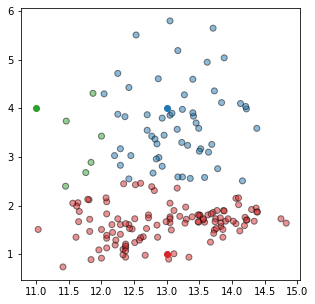

In [75]:
## Assignment Stage
centrDf= cl.assignment2(df_clean, centroids)
centrDf['color'] = centrDf['closest'].map(lambda x: colmap[x])
fig = plt.figure(figsize=(5, 5))
plt.scatter(centrDf['Alcohol'], centrDf['Malic acid'], color=centrDf['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.show()


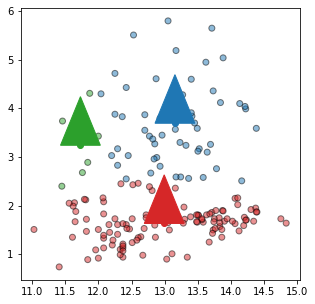

In [78]:
## Update Stage

old_centroids = copy.deepcopy(centroids)
centroids = cl.update2(centrDf, centroids)
centrDf['color'] = centrDf['closest'].map(lambda x: colmap[x])
fig = plt.figure(figsize=(5, 5))
ax = plt.axes()
plt.scatter(centrDf['Alcohol'], centrDf['Malic acid'], color=centrDf['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
for i in old_centroids.keys():
    old_x = old_centroids[i][0]
    old_y = old_centroids[i][1]
    dx = (centroids[i][0] - old_centroids[i][0]) * 0.75
    dy = (centroids[i][1] - old_centroids[i][1]) * 0.75
    ax.arrow(old_x, old_y, dx, dy, head_width=0.6, head_length=1, fc=colmap[i], ec=colmap[i])
plt.show()

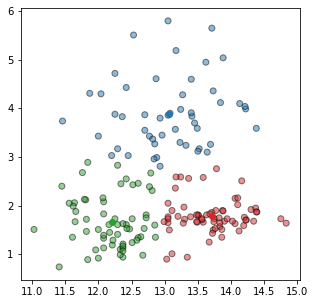

In [66]:
## Repeat Assigment Stage until all assigned categories don't change any more
while True:
    closest_centroids = centrDf['closest'].copy(deep=True)
    centroids = cl.update2(centrDf,centroids)
    centrDf = cl.assignment2(centrDf, centroids)
    centrDf['color'] = centrDf['closest'].map(lambda x: colmap[x])

    if closest_centroids.equals(centrDf['closest']):
        break

fig = plt.figure(figsize=(5, 5))
plt.scatter(centrDf['Alcohol'], centrDf['Malic acid'], color=centrDf['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.show()


### Note1
We didn't chose k=3 randomly, we got help from the elbow method that we show above:

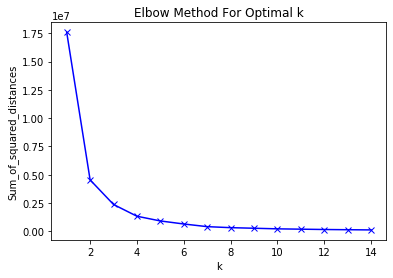

In [67]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
k = range(1,15)
for ks in k:
    km = KMeans(n_clusters=ks)
    km = km.fit(df)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(k, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

### Note2 
For this homework we got inspirated by http://benalexkeen.com/k-means-clustering-in-python/, especially for the visualization (and not required) part